In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest, skew, kurtosis, jarque_bera
import sys
import os


In [7]:

# Configuración básica
np.random.seed(42)
pd.set_option('display.max_columns', None)

# Agregar la carpeta raíz del proyecto al path
sys.path.append(os.path.dirname(os.getcwd()))

from helpers.fetcher import get_spotify_dataset

df = get_spotify_dataset()

Archivo encontrado en: c:\Users\david\Documents\Eafit\Semestre 10\Proyecto integrador\Integrador2-main\Integrador2-main\temp\database_raw.csv
Cargando desde archivo local...


In [8]:
# Forma del dataset. 
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [9]:
# 1. Información básica
print(f"Shape del dataset: {df.shape}")
print(f"\nTipos de datos:")
print(df.dtypes)

Shape del dataset: (1159764, 20)

Tipos de datos:
Unnamed: 0            int64
artist_name          object
track_name           object
track_id             object
popularity            int64
year                  int64
genre                object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object


In [10]:
# 2. Información sobre la variable objetivo
target_col = 'popularity'
print(f"\n--- Variable Objetivo: {target_col} ---")
print(f"Media: {df[target_col].mean():.3f}")
print(f"Rango: {df[target_col].min():.3f} - {df[target_col].max():.3f}")
print(f"Valores nulos: {df[target_col].isnull().sum()}")


--- Variable Objetivo: popularity ---
Media: 18.383
Rango: 0.000 - 100.000
Valores nulos: 0


In [11]:
# 3. Variables numéricas (audio features)
numeric_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                'key', 'liveness', 'loudness', 'mode', 'speechiness', 
                'tempo', 'time_signature', 'valence', 'duration_ms']

Text(0, 0.5, 'Popularity')

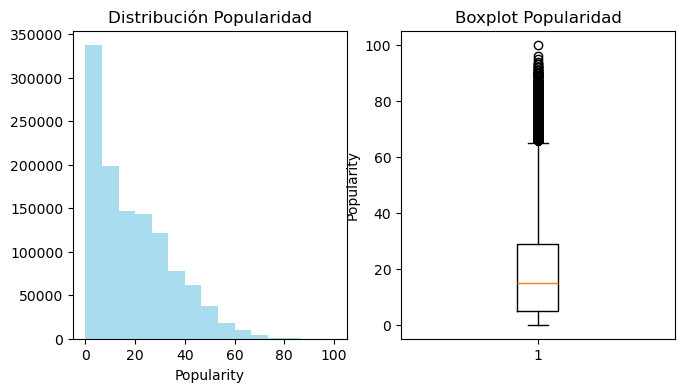

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(df['popularity'], bins=15, alpha=0.7, color='skyblue')
plt.title('Distribución Popularidad')
plt.xlabel('Popularity')

plt.subplot(1, 3, 2)
plt.boxplot(df['popularity'])
plt.title('Boxplot Popularidad')
plt.ylabel('Popularity')

In [13]:
def calculate_detailed_stats(data, var_name):
    """Calcula estadísticas descriptivas detalladas para una variable"""
    clean_data = data.dropna()
    
    stats_dict = {
        'Variable': var_name,
        'Count': len(clean_data),
        'Missing': len(data) - len(clean_data),
        'Mean': clean_data.mean(),
        'Median': clean_data.median(),
        'Mode': clean_data.mode().iloc[0] if not clean_data.mode().empty else np.nan,
        'Std': clean_data.std(),
        'Variance': clean_data.var(),
        'Min': clean_data.min(),
        'Max': clean_data.max(),
        'Range': clean_data.max() - clean_data.min(),
        'Q1': clean_data.quantile(0.25),
        'Q3': clean_data.quantile(0.75),
        'IQR': clean_data.quantile(0.75) - clean_data.quantile(0.25),
        'Skewness': skew(clean_data),
        'Kurtosis': kurtosis(clean_data),
        'CV': (clean_data.std() / clean_data.mean()) * 100 if clean_data.mean() != 0 else 0
    }
    return stats_dict

In [14]:
# Variables numéricas
numeric_vars = ['popularity', 'acousticness', 'danceability', 'energy', 
                'instrumentalness', 'liveness', 'loudness', 
                'speechiness', 'tempo', 'valence', 'duration_ms','year']

detailed_stats = []
for var in numeric_vars:
    stats_dict = calculate_detailed_stats(df[var], var)
    detailed_stats.append(stats_dict)

stats_df = pd.DataFrame(detailed_stats)

In [15]:
stats_df.head(15)

,Variable,Count,Missing,Mean,Median,Mode,Std,Variance,Min,Max,Range,Q1,Q3,IQR,Skewness,Kurtosis,CV
0,popularity,1159764,0,18.383123,15.00000,0.0000,15.885545,2.523505e+02,0.0,100.000,100.000,5.000000,29.000,24.000000,0.810029,0.065269,86.413743
1,acousticness,1159764,0,0.321537,0.14700,0.9950,0.354987,1.260159e-01,0.0,0.996,0.996,0.006400,0.640,0.633600,0.708289,-1.068156,110.403238
2,danceability,1159764,0,0.537438,0.55000,0.5620,0.184478,3.403215e-02,0.0,0.993,0.993,0.413000,0.677,0.264000,-0.300158,-0.501821,34.325440
3,energy,1159764,0,0.639670,0.69400,0.9880,0.270501,7.317073e-02,0.0,1.000,1.000,0.454000,0.873,0.419000,-0.617265,-0.649418,42.287574
4,instrumentalness,1159764,0,0.252349,0.00176,0.0000,0.365073,1.332784e-01,0.0,1.000,1.000,0.000001,0.614,0.613999,0.970837,-0.861966,144.669979
5,liveness,1159764,0,0.223019,0.13400,0.1110,0.201071,4.042943e-02,0.0,1.000,1.000,0.097900,0.292,0.194100,1.955650,3.502858,90.158604
6,loudness,1159764,0,-8.981353,-7.45000,-5.0200,5.682215,3.228757e+01,-58.1,6.172,64.272,-10.829000,-5.276,5.553000,-1.908777,4.863050,-63.266805
7,speechiness,1159764,0,0.092815,0.05070,0.0335,0.126841,1.608862e-02,0.0,0.971,0.971,0.037100,0.089,0.051900,4.473849,23.917292,136.660273
8,tempo,1159764,0,121.377137,121.93100,0.0000,29.779749,8.868334e+02,0.0,249.993,249.993,98.797000,139.903,41.106000,0.237161,-0.099016,24.534891
9,valence,1159764,0,0.455564,0.43800,0.9610,0.268519,7.210244e-02,0.0,1.000,1.000,0.226000,0.674,0.448000,0.173541,-1.077575,58.942151


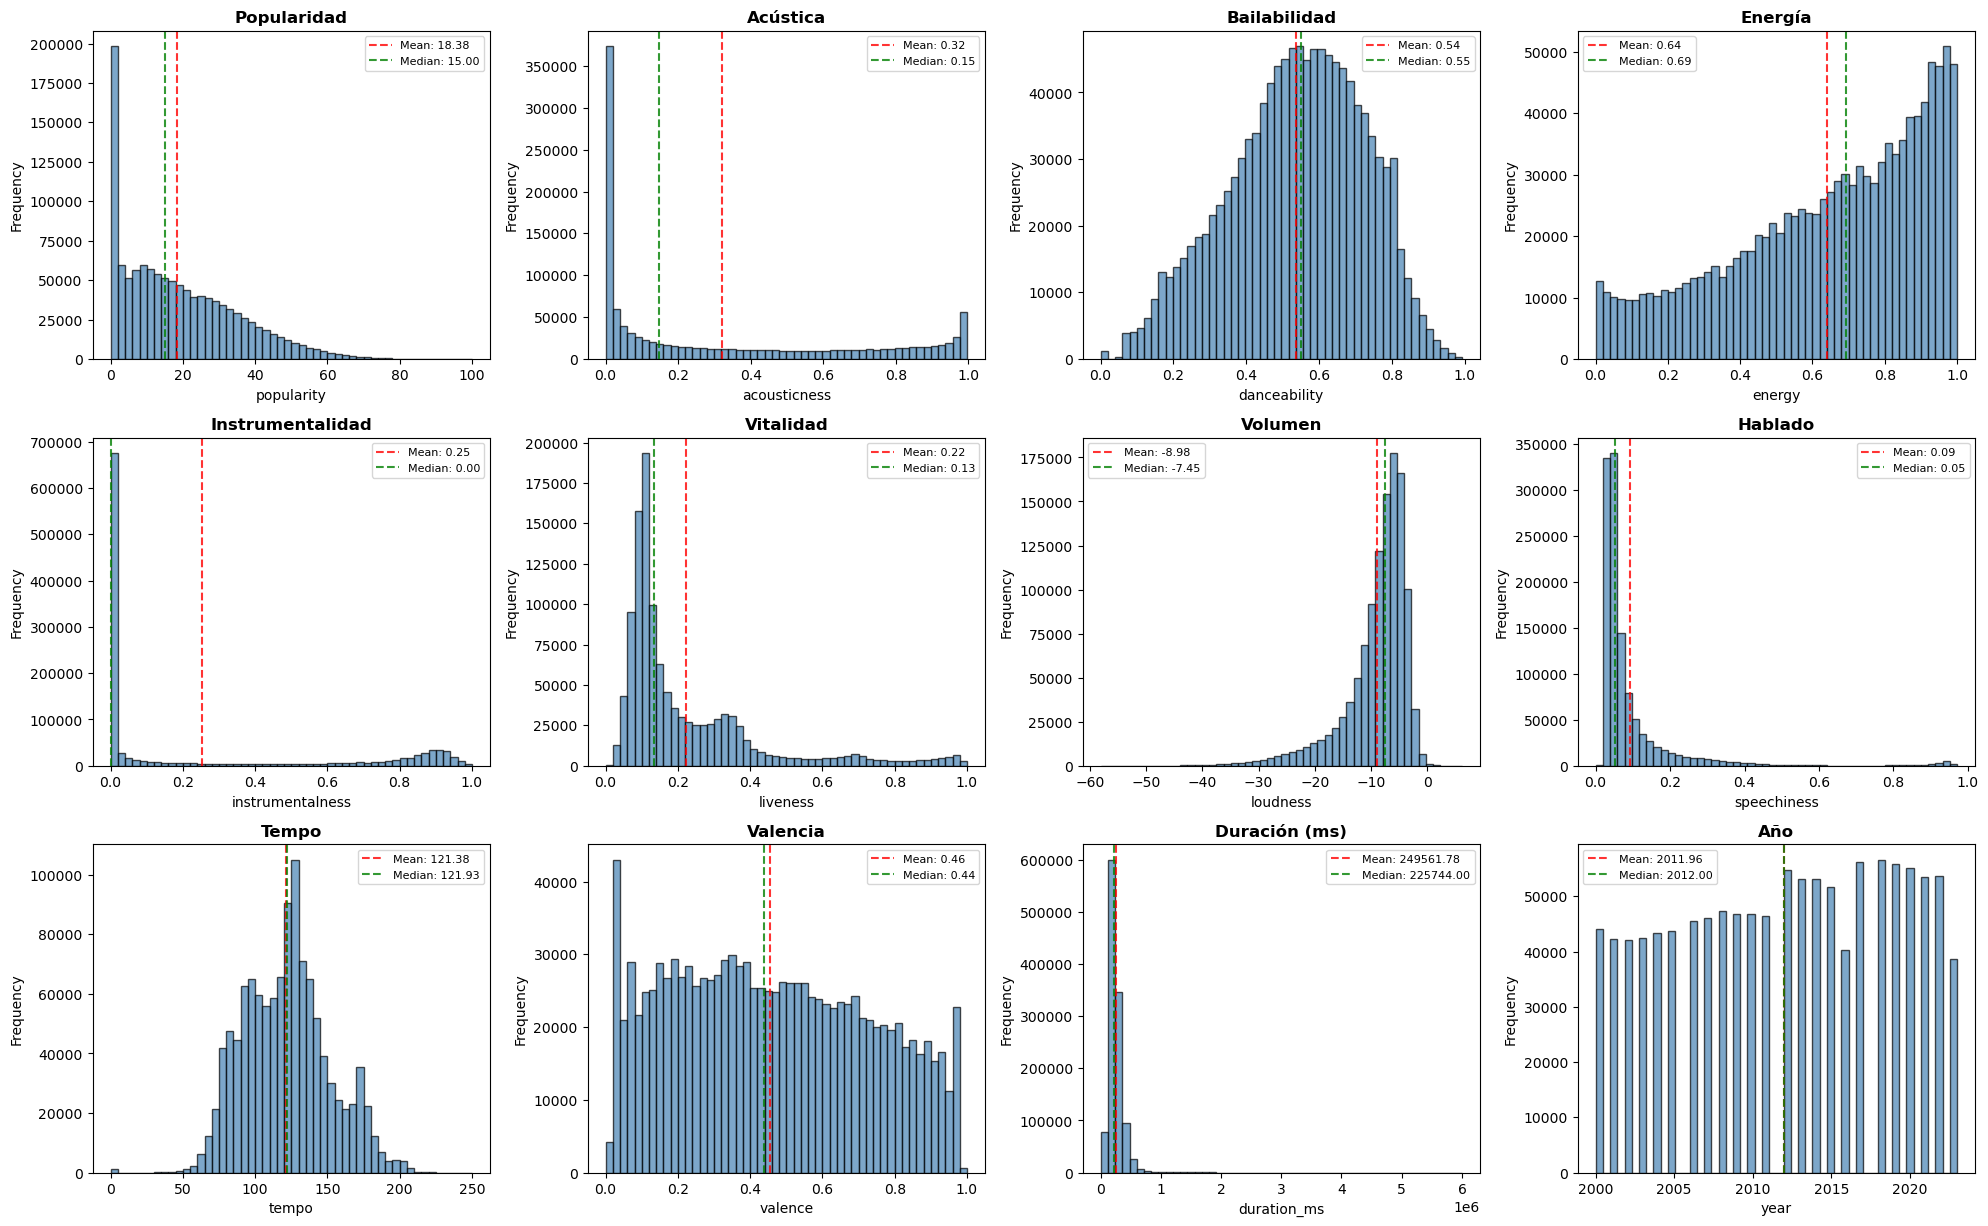


 Estadísticas descriptivas de variables numéricas:
        popularity  acousticness  danceability       energy  instrumentalness  \
count  1159764.000   1159764.000   1159764.000  1159764.000       1159764.000   
mean        18.383         0.322         0.537        0.640             0.252   
std         15.886         0.355         0.184        0.271             0.365   
min          0.000         0.000         0.000        0.000             0.000   
25%          5.000         0.006         0.413        0.454             0.000   
50%         15.000         0.147         0.550        0.694             0.002   
75%         29.000         0.640         0.677        0.873             0.614   
max        100.000         0.996         0.993        1.000             1.000   

          liveness     loudness  speechiness        tempo      valence  \
count  1159764.000  1159764.000  1159764.000  1159764.000  1159764.000   
mean         0.223       -8.981        0.093      121.377        0.456

In [16]:
# Diccionario para traducir los títulos
spanish_titles = {
    'popularity': 'Popularidad',
    'acousticness': 'Acústica',
    'danceability': 'Bailabilidad',
    'energy': 'Energía',
    'instrumentalness': 'Instrumentalidad',
    'liveness': 'Vitalidad',
    'loudness': 'Volumen',
    'speechiness': 'Hablado',
    'tempo': 'Tempo',
    'valence': 'Valencia',
    'duration_ms': 'Duración (ms)',
    'year': 'Año'
}

# Crear grid de histogramas
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.flatten()

for i, var in enumerate(numeric_vars):
    axes[i].hist(df[var], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    axes[i].set_title(f'{spanish_titles[var]}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(var)  # Nombre original de la variable
    axes[i].set_ylabel('Frequency')
    
    # Agregar estadísticas básicas
    mean_val = df[var].mean()
    median_val = df[var].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', alpha=0.8, label=f'Median: {median_val:.2f}')
    axes[i].legend(fontsize=8)

# Ocultar subplot vacíos si los hay
for j in range(len(numeric_vars), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Estadísticas descriptivas
print("\n Estadísticas descriptivas de variables numéricas:")
print(df[numeric_vars].describe().round(3))

MAPA DE CALOR: CORRELACIONES ENTRE VARIABLES NUMÉRICAS


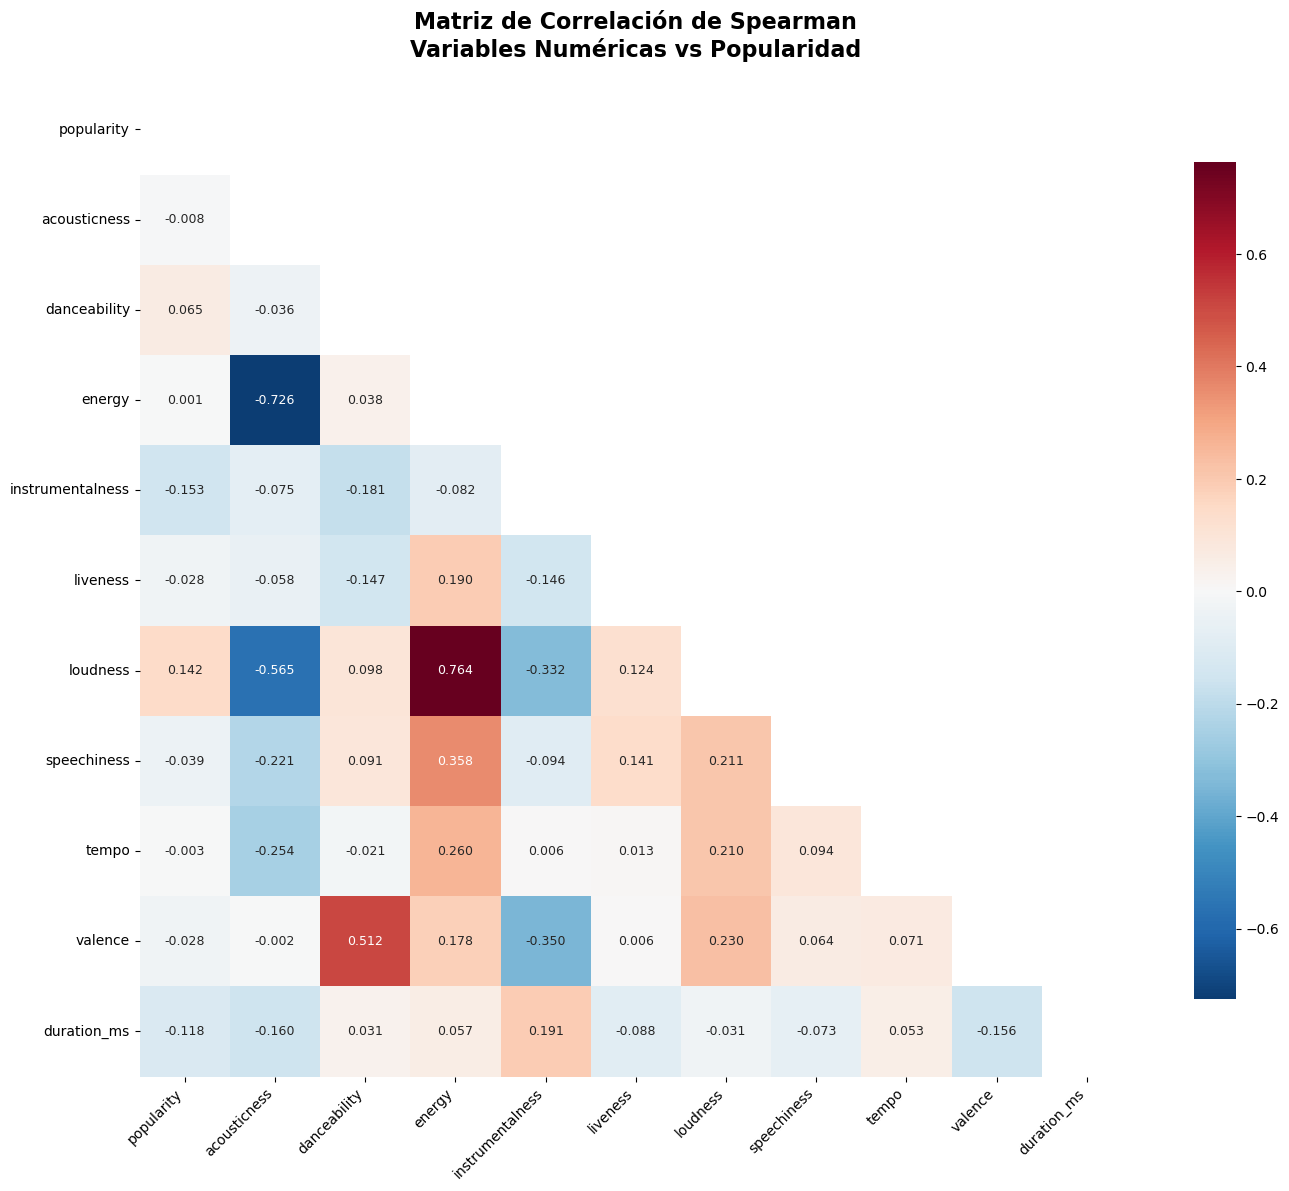

In [17]:
# Variables continuas para analizar
continuous_vars = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                   'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms']

print("MAPA DE CALOR: CORRELACIONES ENTRE VARIABLES NUMÉRICAS")
print("=" * 60)

# Seleccionar solo variables numéricas (incluyendo popularidad)
numeric_vars = ['popularity'] + continuous_vars
correlation_matrix = df[numeric_vars].corr(method='spearman')

# Crear el mapa de calor
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara para mostrar solo la mitad

heatmap = sns.heatmap(correlation_matrix, 
                     mask=mask,
                     annot=True,
                     cmap='RdBu_r',
                     center=0,
                     square=True,
                     fmt='.3f',
                     cbar_kws={"shrink": .8},
                     annot_kws={'fontsize': 9})

plt.title('Matriz de Correlación de Spearman\nVariables Numéricas vs Popularidad', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\david\AppData\Local\Temp\ipykernel_22840\3240525043.py:35: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(pad=2.5)
c:\Users\david\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


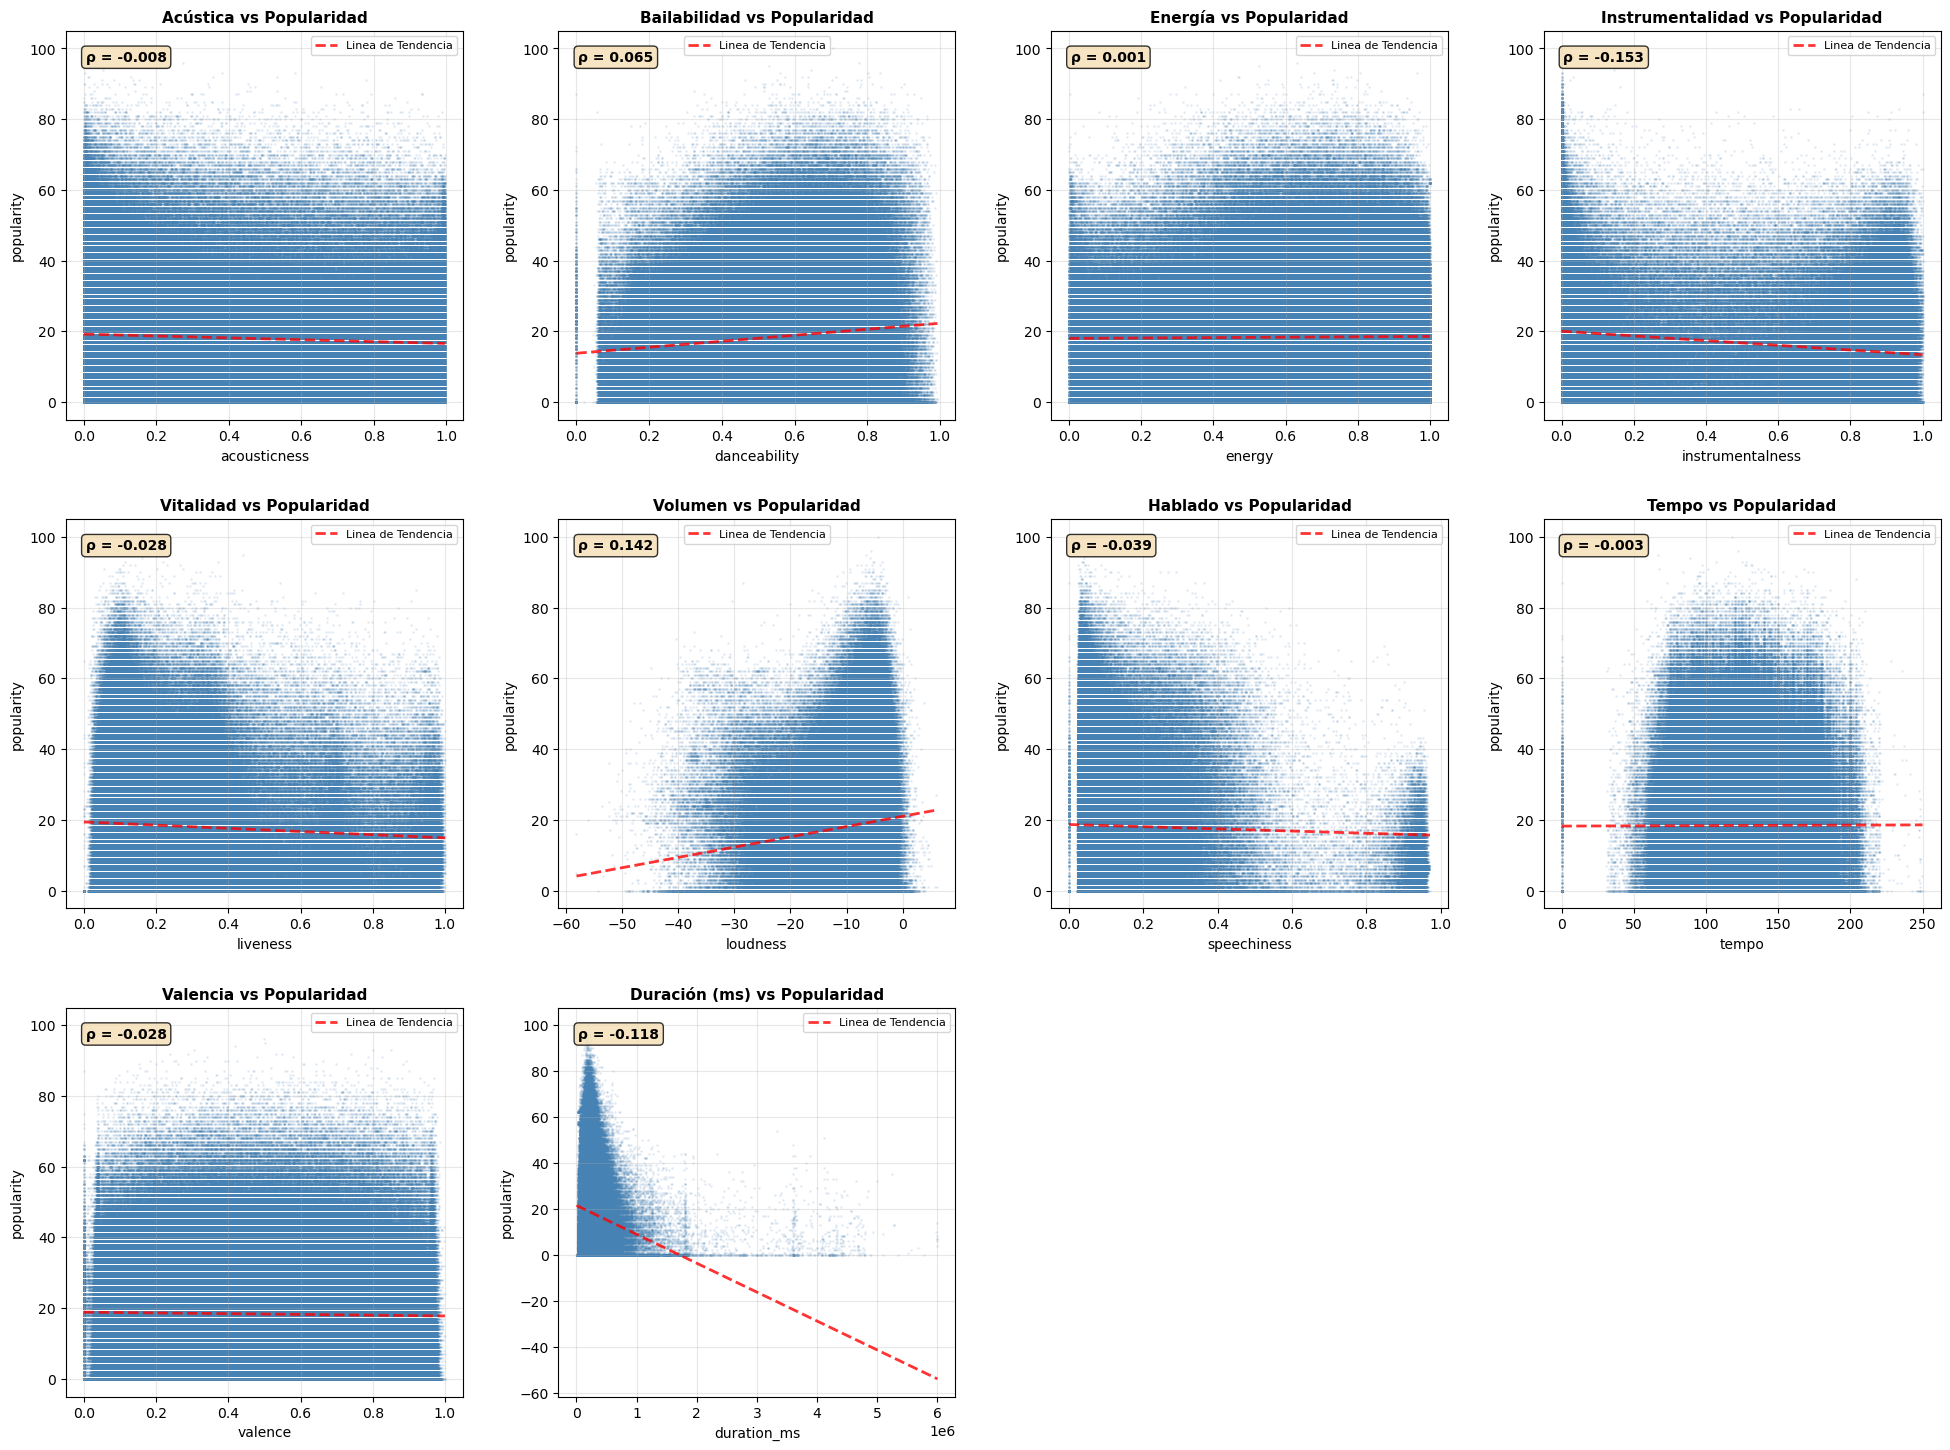


 Correlaciones Spearman con Popularidad:
--------------------------------------------------
 1. instrumentalness    : -0.1530 ███████
 2. loudness            :  0.1425 ███████
 3. duration_ms         : -0.1176 █████
 4. danceability        :  0.0648 ███
 5. speechiness         : -0.0394 █
 6. valence             : -0.0283 █
 7. liveness            : -0.0280 █
 8. acousticness        : -0.0084 
 9. tempo               : -0.0034 
10. energy              :  0.0012 

 Scatter plots completados!


In [18]:
# Crear grid de scatter plots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for i, var in enumerate(continuous_vars):
    # Scatter plot
    axes[i].scatter(df[var], df['popularity'], alpha=0.1, s=1, color='steelblue')
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel('popularity', fontsize=10)
    axes[i].set_title(f'{spanish_titles[var]} vs Popularidad', fontsize=11, fontweight='bold')
    axes[i].grid(True, alpha=0.3)
    
    # Línea de tendencia
    z = np.polyfit(df[var].dropna(), df['popularity'][df[var].notna()], 1)
    p = np.poly1d(z)
    x_range = np.linspace(df[var].min(), df[var].max(), 100)
    axes[i].plot(x_range, p(x_range), "r--", alpha=0.8, linewidth=2, label='Linea de Tendencia')
    
    # Calcular correlación de Spearman
    from scipy.stats import spearmanr
    corr, _ = spearmanr(df[var].dropna(), df['popularity'][df[var].notna()])
    axes[i].text(0.05, 0.95, f'ρ = {corr:.3f}', 
                transform=axes[i].transAxes, 
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                verticalalignment='top')
    
    # Agregar leyenda
    axes[i].legend(fontsize=8)

# Ocultar subplots vacíos
for j in range(len(continuous_vars), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(pad=2.5)
plt.show()

# Tabla de correlaciones
print("\n Correlaciones Spearman con Popularidad:")
print("-" * 50)
correlations = []
for var in continuous_vars:
    corr, _ = spearmanr(df[var].dropna(), df['popularity'][df[var].notna()])
    correlations.append((var, corr))

# Ordenar por correlación absoluta
correlations_sorted = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)
for i, (var, corr) in enumerate(correlations_sorted, 1):
    bar = '█' * int(abs(corr) * 50)
    print(f"{i:2d}. {var:20s}: {corr:7.4f} {bar}")

print("\n Scatter plots completados!")

Text(0, 0.5, 'Frequency')

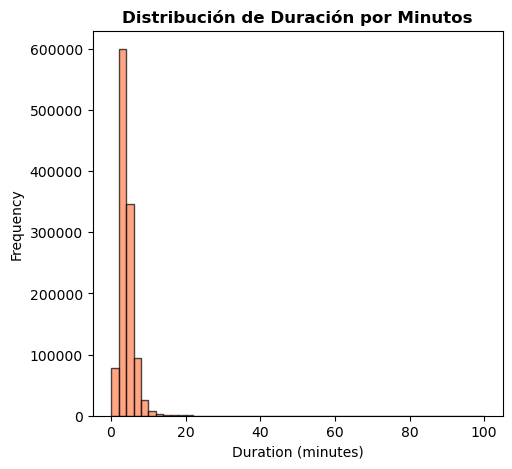

In [19]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
# Convertir a minutos para mejor interpretación
duration_min = df['duration_ms'] / 60000
plt.hist(duration_min, bins=50, alpha=0.7, color='coral', edgecolor='black')
plt.title('Distribución de Duración por Minutos', fontsize=12, fontweight='bold')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

Canciones entre 1-10 minutos: 1,130,721


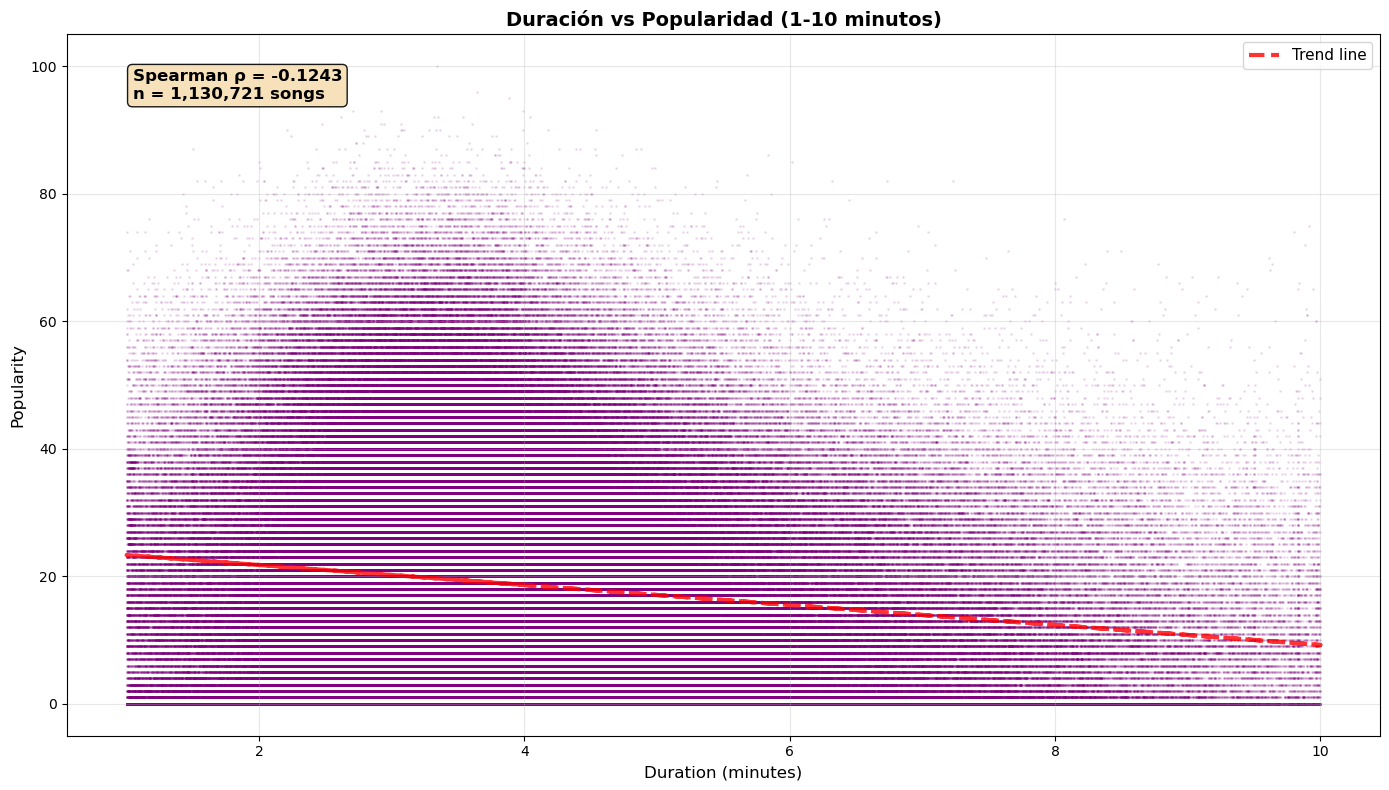


📊 Correlación Spearman: -0.1243


In [20]:
# Convertir duración a minutos
df['duration_min'] = df['duration_ms'] / 60000

# Filtrar datos entre 1 y 10 minutos
df_filtered = df[(df['duration_min'] >= 1) & (df['duration_min'] <= 10)]

print(f"Canciones entre 1-10 minutos: {len(df_filtered):,}")

# Crear gráfica
plt.figure(figsize=(14, 8))

# Scatter plot
plt.scatter(df_filtered['duration_min'], df_filtered['popularity'], 
           alpha=0.1, s=1, color='purple')

plt.title('Duración vs Popularidad (1-10 minutos)', fontsize=14, fontweight='bold')
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.grid(True, alpha=0.3)

# Línea de tendencia
z = np.polyfit(df_filtered['duration_min'], df_filtered['popularity'], 1)
p = np.poly1d(z)
plt.plot(df_filtered['duration_min'], p(df_filtered['duration_min']), 
        "r--", alpha=0.8, linewidth=3, label='Trend line')

# Calcular correlación
corr, _ = spearmanr(df_filtered['duration_min'], df_filtered['popularity'])

# Agregar texto con correlación
plt.text(0.05, 0.95, f'Spearman ρ = {corr:.4f}\nn = {len(df_filtered):,} songs', 
        transform=plt.gca().transAxes, 
        fontsize=12, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9),
        verticalalignment='top')

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"\n📊 Correlación Spearman: {corr:.4f}")

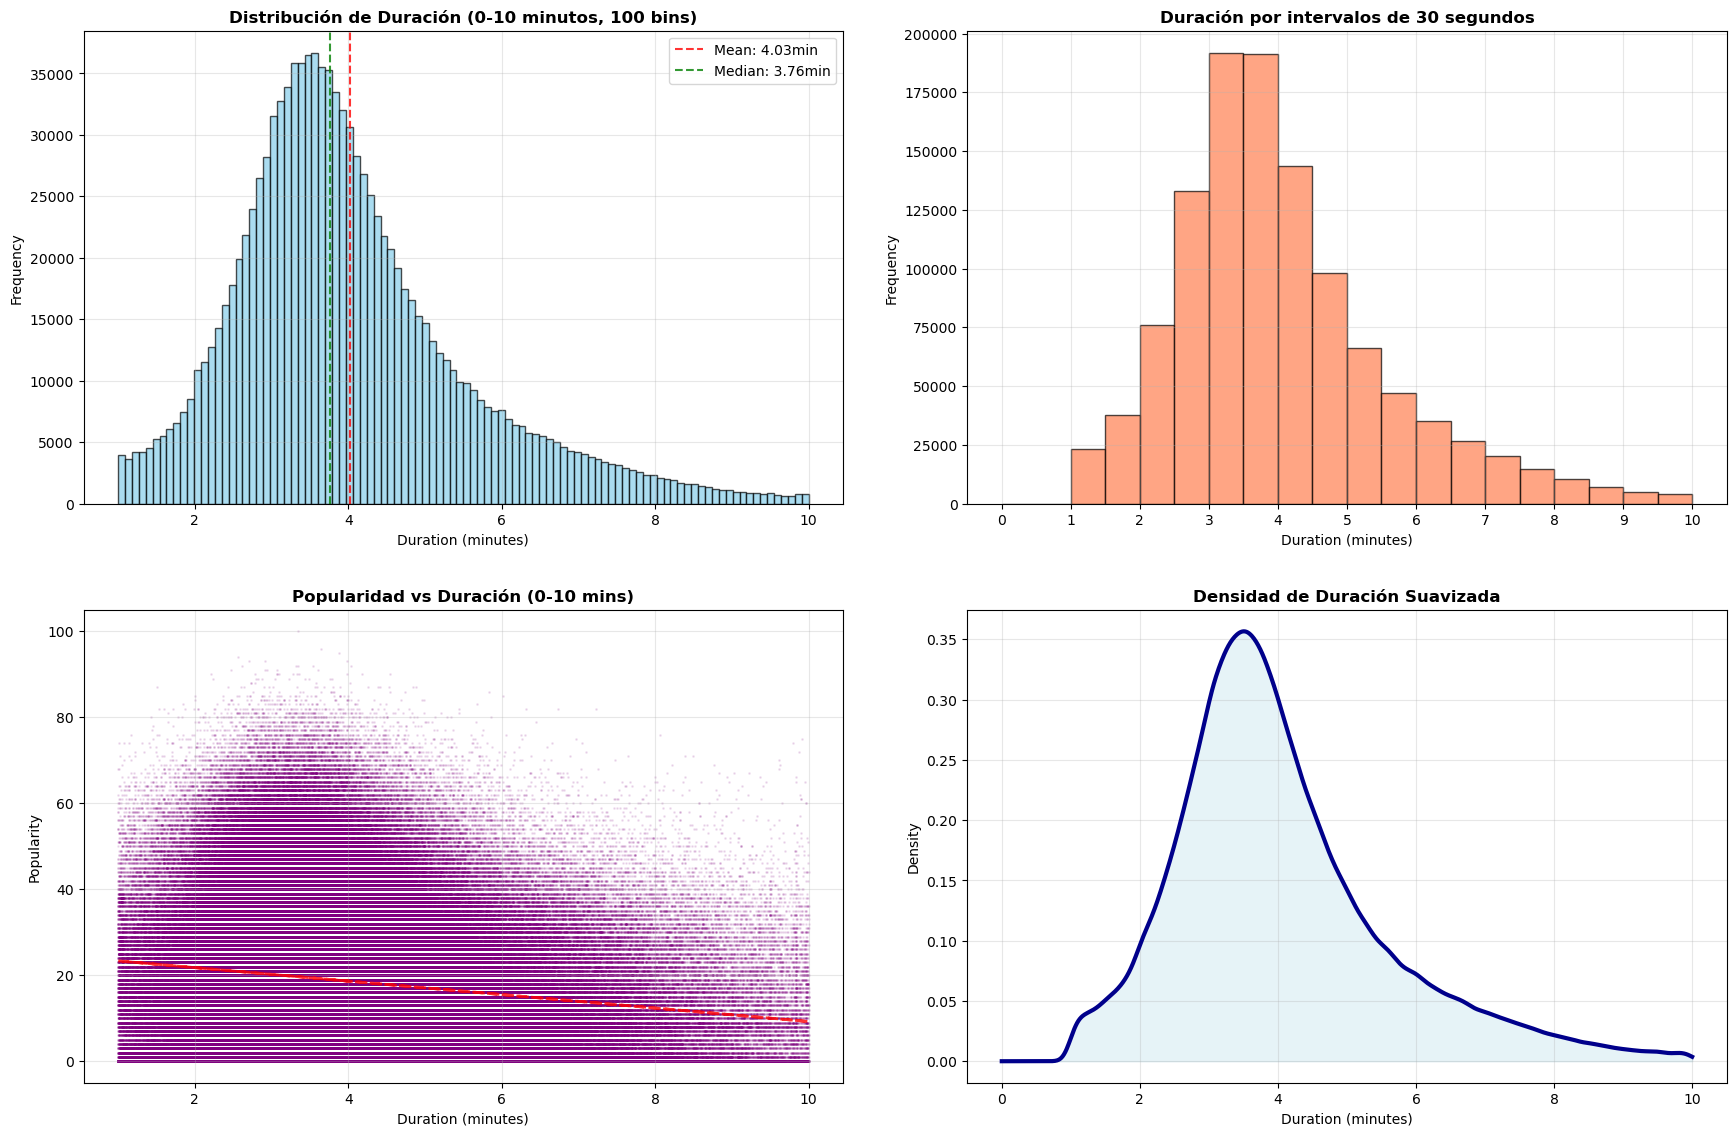


📊 Estadísticas detalladas (0-10 minutos):
Media: 4.03 minutos
Mediana: 3.76 minutos
Moda aproximada: 4.00 minutos
Desviación estándar: 1.53 minutos


In [21]:
# Crear visualización detallada
plt.figure(figsize=(18, 12))  # Figura más grande

# 1. Histograma detallado con bins finos
plt.subplot(2, 2, 1)
plt.hist(df_filtered['duration_min'], bins=100, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribución de Duración (0-10 minutos, 100 bins)', fontsize=12, fontweight='bold')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Estadísticas básicas
mean_dur = df_filtered['duration_min'].mean()
median_dur = df_filtered['duration_min'].median()
plt.axvline(mean_dur, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_dur:.2f}min')
plt.axvline(median_dur, color='green', linestyle='--', alpha=0.8, label=f'Median: {median_dur:.2f}min')
plt.legend()

# 2. Histograma por intervalos de 30 segundos
plt.subplot(2, 2, 2)
bins_per_minute = np.arange(0, 10.1, 0.5)  # Bins cada 30 segundos
plt.hist(df_filtered['duration_min'], bins=bins_per_minute, alpha=0.7, color='coral', edgecolor='black')
plt.title('Duración por intervalos de 30 segundos', fontsize=12, fontweight='bold')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.xticks(range(0, 11, 1))
plt.grid(True, alpha=0.3)

# 3. Popularidad vs Duración
plt.subplot(2, 2, 3)
plt.scatter(df_filtered['duration_min'], df_filtered['popularity'], alpha=0.1, s=1, color='purple')
plt.title('Popularidad vs Duración (0-10 mins)', fontsize=12, fontweight='bold')
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.grid(True, alpha=0.3)

# Línea de tendencia
z = np.polyfit(df_filtered['duration_min'], df_filtered['popularity'], 1)
p = np.poly1d(z)
plt.plot(df_filtered['duration_min'], p(df_filtered['duration_min']), "r--", alpha=0.8, linewidth=2)

# 4. Density plot suavizado
plt.subplot(2, 2, 4)
from scipy.stats import gaussian_kde
kde = gaussian_kde(df_filtered['duration_min'])
x_range = np.linspace(0, 10, 1000)
density = kde(x_range)
plt.plot(x_range, density, linewidth=3, color='darkblue')
plt.fill_between(x_range, density, alpha=0.3, color='lightblue')
plt.title('Densidad de Duración Suavizada', fontsize=12, fontweight='bold')
plt.xlabel('Duration (minutes)')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)

plt.tight_layout(pad=3.0)  # Más espacio entre gráficas
plt.show()

# Estadísticas detalladas
print(f"\n📊 Estadísticas detalladas (0-10 minutos):")
print(f"Media: {mean_dur:.2f} minutos")
print(f"Mediana: {median_dur:.2f} minutos")
print(f"Moda aproximada: {df_filtered['duration_min'].mode().iloc[0]:.2f} minutos")
print(f"Desviación estándar: {df_filtered['duration_min'].std():.2f} minutos")

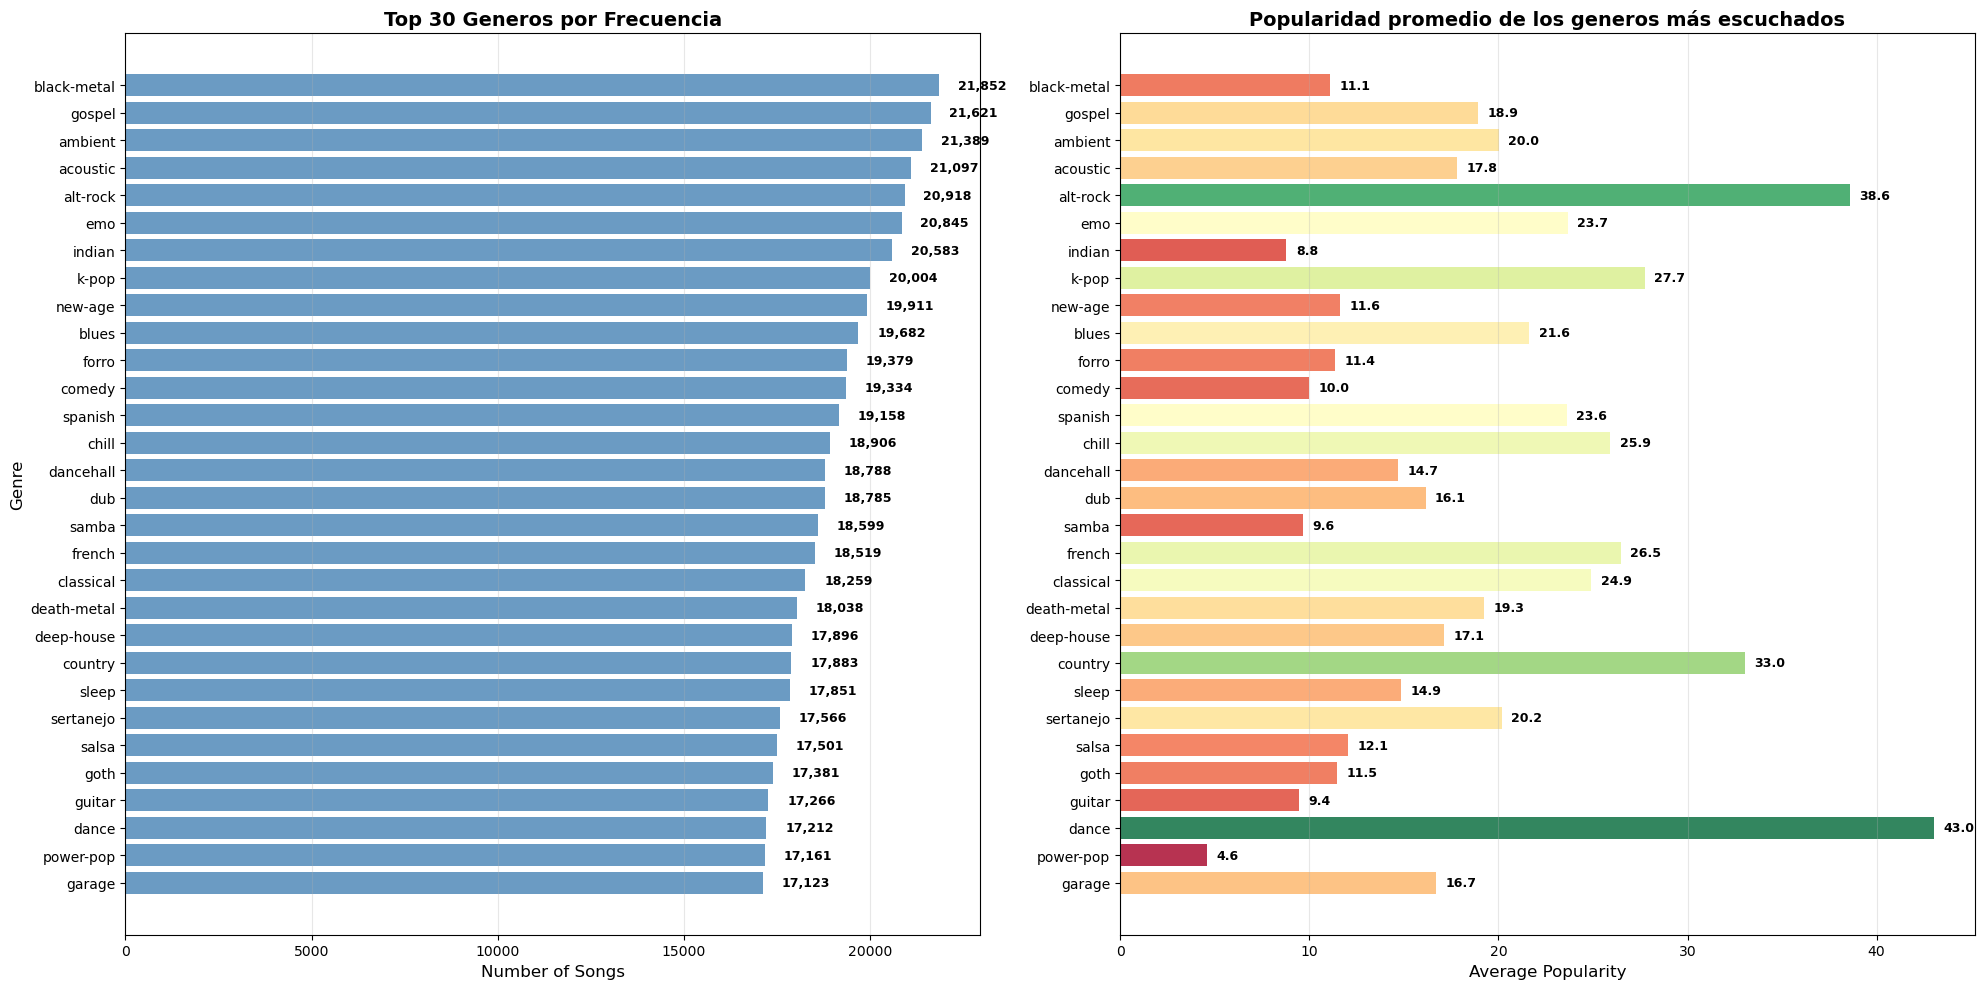

Top 30 géneros - Frecuencia vs Popularidad:
Rank  Genre                            Songs    Avg Pop
------------------------------------------------------------
1     black-metal                     21,852      11.09
2     gospel                          21,621      18.92
3     ambient                         21,389      20.01
4     acoustic                        21,097      17.83
5     alt-rock                        20,918      38.60
6     emo                             20,845      23.66
7     indian                          20,583       8.79
8     k-pop                           20,004      27.74
9     new-age                         19,911      11.64
10    blues                           19,682      21.62
11    forro                           19,379      11.37
12    comedy                          19,334      10.01
13    spanish                         19,158      23.60
14    chill                           18,906      25.91
15    dancehall                       18,788      14.68

In [22]:
# Top 30 géneros por frecuencia
genre_counts = df['genre'].value_counts().head(30)

# Calcular popularidad promedio por género
genre_popularity = df.groupby('genre')['popularity'].mean()

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Gráfico 1: Frecuencia
bars1 = ax1.barh(range(len(genre_counts)), genre_counts.values, color='steelblue', alpha=0.8)
ax1.set_yticks(range(len(genre_counts)))
ax1.set_yticklabels(genre_counts.index)
ax1.set_xlabel('Number of Songs', fontsize=12)
ax1.set_ylabel('Genre', fontsize=12)
ax1.set_title('Top 30 Generos por Frecuencia', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

# Agregar valores
for i, v in enumerate(genre_counts.values):
    ax1.text(v + 500, i, f'{v:,}', va='center', fontweight='bold', fontsize=9)

ax1.grid(True, alpha=0.3, axis='x')

# Gráfico 2: Popularidad promedio (mismo orden que frecuencia)
popularity_values = [genre_popularity[genre] for genre in genre_counts.index]
colors = plt.cm.RdYlGn([(p - min(popularity_values)) / (max(popularity_values) - min(popularity_values)) 
                        for p in popularity_values])
bars2 = ax2.barh(range(len(genre_counts)), popularity_values, color=colors, alpha=0.8)
ax2.set_yticks(range(len(genre_counts)))
ax2.set_yticklabels(genre_counts.index)
ax2.set_xlabel('Average Popularity', fontsize=12)
ax2.set_title('Popularidad promedio de los generos más escuchados', fontsize=14, fontweight='bold')
ax2.invert_yaxis()

# Agregar valores
for i, v in enumerate(popularity_values):
    ax2.text(v + 0.5, i, f'{v:.1f}', va='center', fontweight='bold', fontsize=9)

ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Tabla comparativa
print("Top 30 géneros - Frecuencia vs Popularidad:")
print(f"{'Rank':<5} {'Genre':<25} {'Songs':>12} {'Avg Pop':>10}")
print("-" * 60)
for i, genre in enumerate(genre_counts.index, 1):
    count = genre_counts[genre]
    pop = genre_popularity[genre]
    print(f"{i:<5} {genre:<25} {count:>12,} {pop:>10.2f}")

TOP 20 GÉNEROS MÁS POPULARES


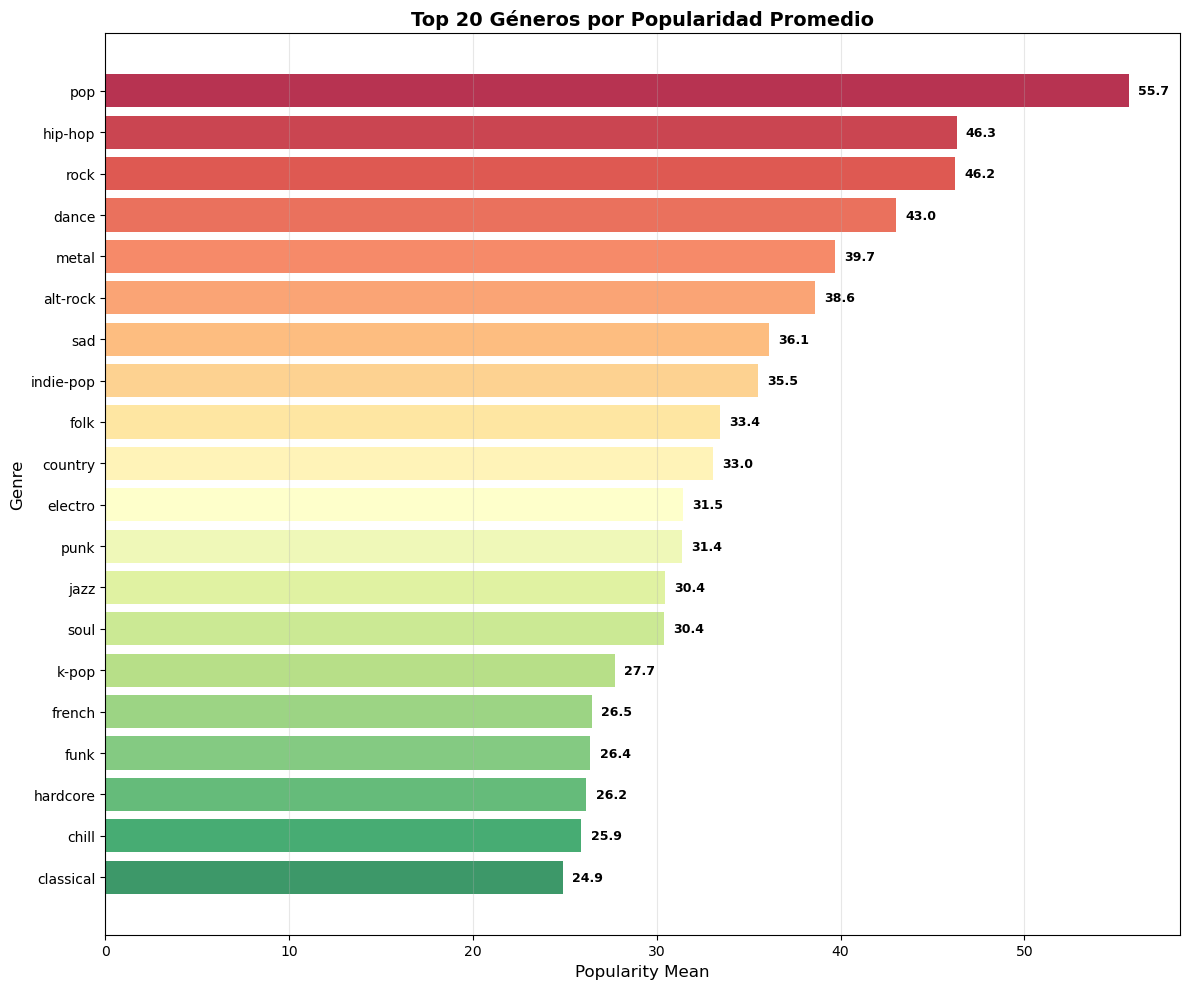


 TOP 20 GÉNEROS MÁS POPULARES:
Rank  Género                     Popularidad  Canciones
-----------------------------------------------------------------
1     pop                              55.69       6235
2     hip-hop                          46.32      15703
3     rock                             46.23       3319
4     dance                            43.03      17212
5     metal                            39.70       7020
6     alt-rock                         38.60      20918
7     sad                              36.12       6086
8     indie-pop                        35.52      10022
9     folk                             33.45      16170
10    country                          33.05      17883
11    electro                          31.45      11406
12    punk                             31.37       6197
13    jazz                             30.43      15943
14    soul                             30.39       8974
15    k-pop                            27.74      20004
16    

In [23]:
print("TOP 20 GÉNEROS MÁS POPULARES")
print("=" * 40)

# Top 20 géneros por popularidad promedio
genre_popularity = df.groupby('genre')['popularity'].mean().sort_values(ascending=False).head(20)
genre_counts = df['genre'].value_counts()

# Crear la gráfica
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Gráfico de barras horizontales
colors = plt.cm.RdYlGn([i/len(genre_popularity) for i in range(len(genre_popularity))])
bars = ax.barh(range(len(genre_popularity)), genre_popularity.values, color=colors, alpha=0.8)

# Personalizar
ax.set_yticks(range(len(genre_popularity)))
ax.set_yticklabels(genre_popularity.index)
ax.set_xlabel('Popularity Mean', fontsize=12)
ax.set_ylabel('Genre', fontsize=12)
ax.set_title('Top 20 Géneros por Popularidad Promedio', fontsize=14, fontweight='bold')
ax.invert_yaxis()

# Agregar valores
for i, (genre, pop_value) in enumerate(genre_popularity.items()):
    ax.text(pop_value + 0.5, i, f'{pop_value:.1f}', 
            va='center', fontweight='bold', fontsize=9)
    
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Tabla informativa
print("\n TOP 20 GÉNEROS MÁS POPULARES:")
print("=" * 65)
print(f"{'Rank':<5} {'Género':<25} {'Popularidad':>12} {'Canciones':>10}")
print("-" * 65)

for i, (genre, pop_value) in enumerate(genre_popularity.items(), 1):
    song_count = genre_counts[genre]
    print(f"{i:<5} {genre:<25} {pop_value:>12.2f} {song_count:>10}")

print(f"\n Análisis completado - {len(genre_popularity)} géneros analizados")

 VARIABLES CATEGÓRICAS VS POPULARIDAD


C:\Users\david\AppData\Local\Temp\ipykernel_22840\1862625128.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sample_data, y='genre', x='popularity', order=top_genres.index, palette='Set2')
C:\Users\david\AppData\Local\Temp\ipykernel_22840\1862625128.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mode_label', y='popularity', palette='pastel')


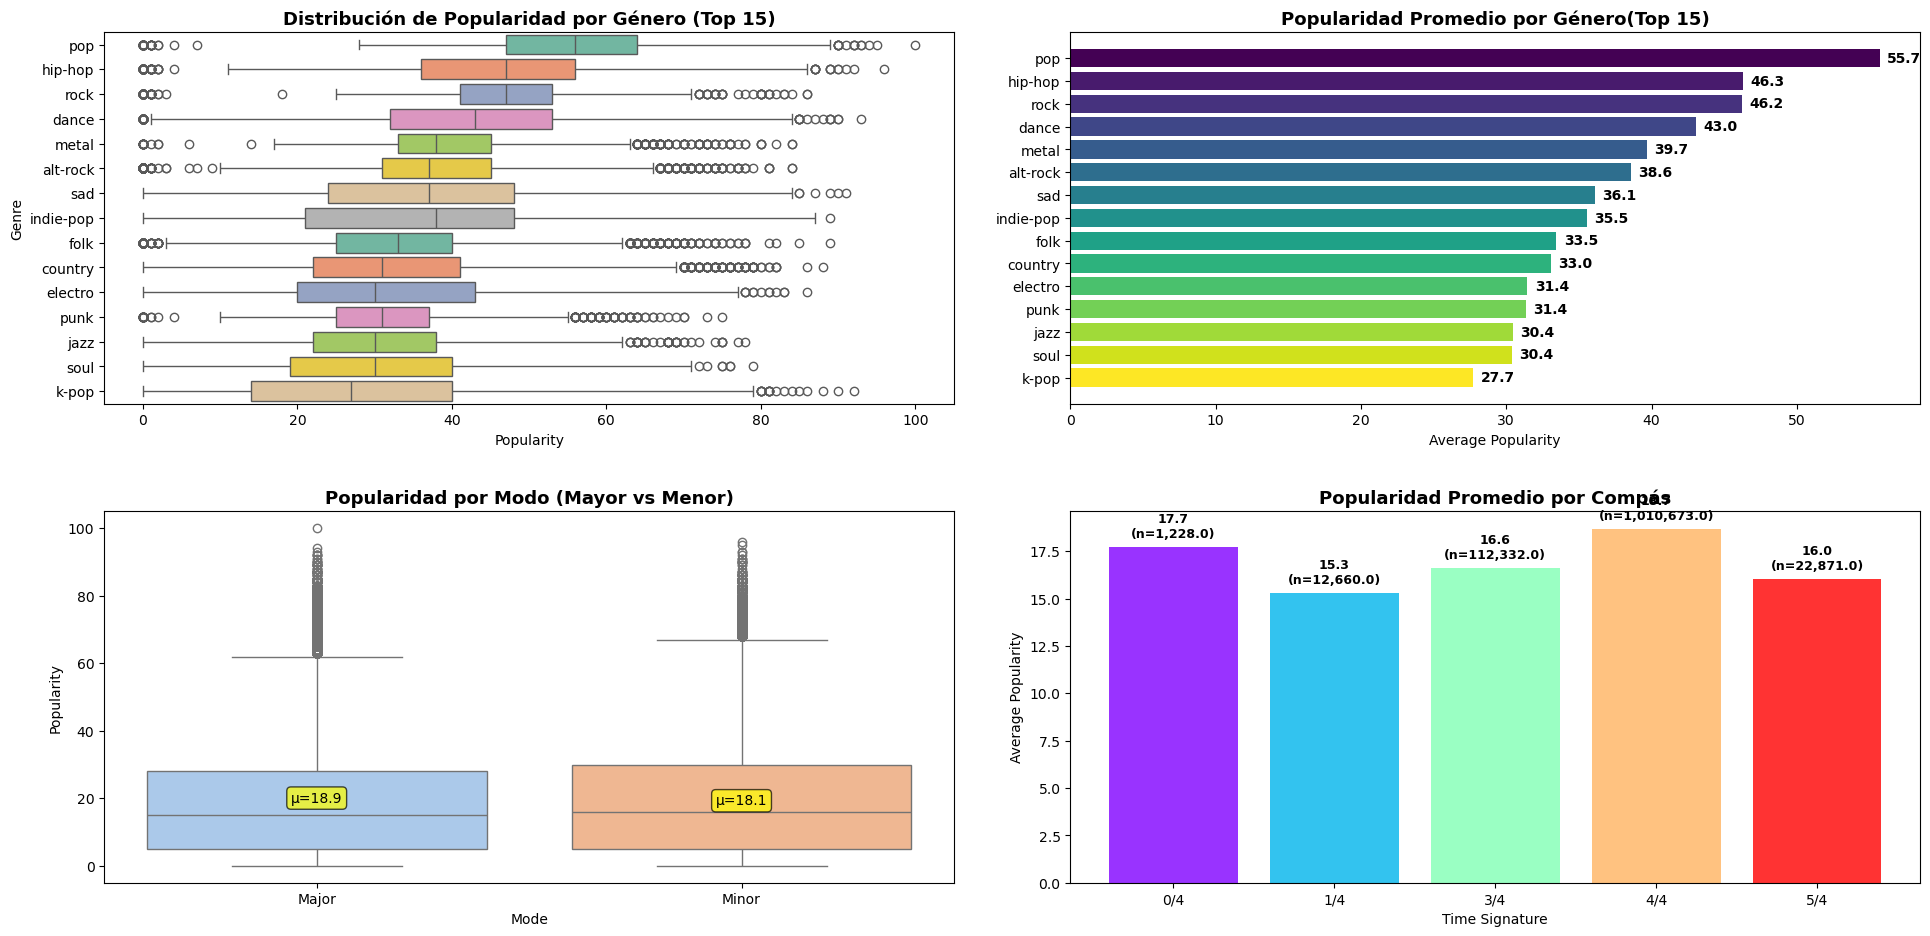


 ESTADÍSTICAS POR VARIABLE CATEGÓRICA:

1. GÉNERO (Top 5 más populares):
   1. pop: 55.69 avg popularity (6,235.0 songs)
   2. hip-hop: 46.32 avg popularity (15,703.0 songs)
   3. rock: 46.23 avg popularity (3,319.0 songs)
   4. dance: 43.03 avg popularity (17,212.0 songs)
   5. metal: 39.70 avg popularity (7,020.0 songs)

2. MODE:
   Major: 18.10 avg popularity (736,048.0 songs)
   Minor: 18.88 avg popularity (423,716.0 songs)

3. TIME SIGNATURE:
   0/4: 17.74 avg popularity (1,228.0 songs)
   1/4: 15.30 avg popularity (12,660.0 songs)
   3/4: 16.61 avg popularity (112,332.0 songs)
   4/4: 18.67 avg popularity (1,010,673.0 songs)
   5/4: 16.03 avg popularity (22,871.0 songs)

 Análisis de variables categóricas completado!


In [24]:
print(" VARIABLES CATEGÓRICAS VS POPULARIDAD")
print("=" * 50)

# 1. GÉNERO (Top 15 por popularidad promedio)
genre_stats = df.groupby('genre')['popularity'].agg(['mean', 'count']).round(2)
genre_stats = genre_stats[genre_stats['count'] >= 1000]  # Filtro mínimo
top_genres = genre_stats.sort_values('mean', ascending=False).head(15)

plt.figure(figsize=(20, 10))

# Boxplot de géneros
plt.subplot(2, 2, 1)
sample_data = df[df['genre'].isin(top_genres.index)]
sns.boxplot(data=sample_data, y='genre', x='popularity', order=top_genres.index, palette='Set2')
plt.title('Distribución de Popularidad por Género (Top 15)', fontsize=13, fontweight='bold')
plt.xlabel('Popularity')
plt.ylabel('Genre')

# Bar plot de popularidad promedio por género
plt.subplot(2, 2, 2)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_genres)))
bars = plt.barh(range(len(top_genres)), top_genres['mean'], color=colors)
plt.yticks(range(len(top_genres)), top_genres.index)
plt.xlabel('Average Popularity')
plt.title('Popularidad Promedio por Género(Top 15)', fontsize=13, fontweight='bold')
plt.gca().invert_yaxis()

# Agregar valores
for i, v in enumerate(top_genres['mean']):
    plt.text(v + 0.5, i, f'{v:.1f}', va='center', fontweight='bold')

# 2. MODE (Major vs Minor)
plt.subplot(2, 2, 3)
mode_labels = {0: 'Minor', 1: 'Major'}
df['mode_label'] = df['mode'].map(mode_labels)
sns.boxplot(data=df, x='mode_label', y='popularity', palette='pastel')
plt.title('Popularidad por Modo (Mayor vs Menor)', fontsize=13, fontweight='bold')
plt.xlabel('Mode')
plt.ylabel('Popularity')

# Agregar estadísticas
mode_stats = df.groupby('mode_label')['popularity'].agg(['mean', 'count'])
for i, mode in enumerate(['Minor', 'Major']):
    if mode in mode_stats.index:
        mean_val = mode_stats.loc[mode, 'mean']
        plt.text(i, mean_val, f'μ={mean_val:.1f}', ha='center', 
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# 3. TIME SIGNATURE
plt.subplot(2, 2, 4)
time_sig_stats = df.groupby('time_signature')['popularity'].agg(['mean', 'count'])
time_sig_stats = time_sig_stats[time_sig_stats['count'] >= 100]  # Filtro mínimo

colors_ts = plt.cm.rainbow(np.linspace(0, 1, len(time_sig_stats)))
bars = plt.bar(range(len(time_sig_stats)), time_sig_stats['mean'], color=colors_ts, alpha=0.8)
plt.xticks(range(len(time_sig_stats)), [f'{int(x)}/4' for x in time_sig_stats.index])
plt.xlabel('Time Signature')
plt.ylabel('Average Popularity')
plt.title('Popularidad Promedio por Compás', fontsize=13, fontweight='bold')

# Agregar valores y conteos
for i, (idx, row) in enumerate(time_sig_stats.iterrows()):
    plt.text(i, row['mean'] + 0.5, f"{row['mean']:.1f}\n(n={row['count']:,})", 
            ha='center', fontweight='bold', fontsize=9)

plt.tight_layout(pad=3.0)
plt.show()

# Estadísticas por variable
print("\n ESTADÍSTICAS POR VARIABLE CATEGÓRICA:")
print("\n1. GÉNERO (Top 5 más populares):")
for i, (genre, row) in enumerate(top_genres.head(5).iterrows(), 1):
    print(f"   {i}. {genre}: {row['mean']:.2f} avg popularity ({row['count']:,} songs)")

print("\n2. MODE:")
for mode, row in mode_stats.iterrows():
    print(f"   {mode}: {row['mean']:.2f} avg popularity ({row['count']:,} songs)")

print("\n3. TIME SIGNATURE:")
for ts, row in time_sig_stats.iterrows():
    print(f"   {int(ts)}/4: {row['mean']:.2f} avg popularity ({row['count']:,} songs)")

print("\n Análisis de variables categóricas completado!")

In [25]:
print("Distribución de Compás")
print("=" * 40)

# Contar time signatures
time_sig_counts = df['time_signature'].value_counts().sort_index()

print("\nTime Signature | Canciones | Porcentaje")
print("-" * 40)
for ts, count in time_sig_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{int(ts)}/4          | {count:>9,} | {percentage:>6.2f}%")

print(f"\nTotal: {len(df):,} canciones")

Distribución de Compás

Time Signature | Canciones | Porcentaje
----------------------------------------
0/4          |     1,228 |   0.11%
1/4          |    12,660 |   1.09%
3/4          |   112,332 |   9.69%
4/4          | 1,010,673 |  87.14%
5/4          |    22,871 |   1.97%

Total: 1,159,764 canciones


C:\Users\david\AppData\Local\Temp\ipykernel_22840\2431224973.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=plot_data, x='time_signature', y='count',


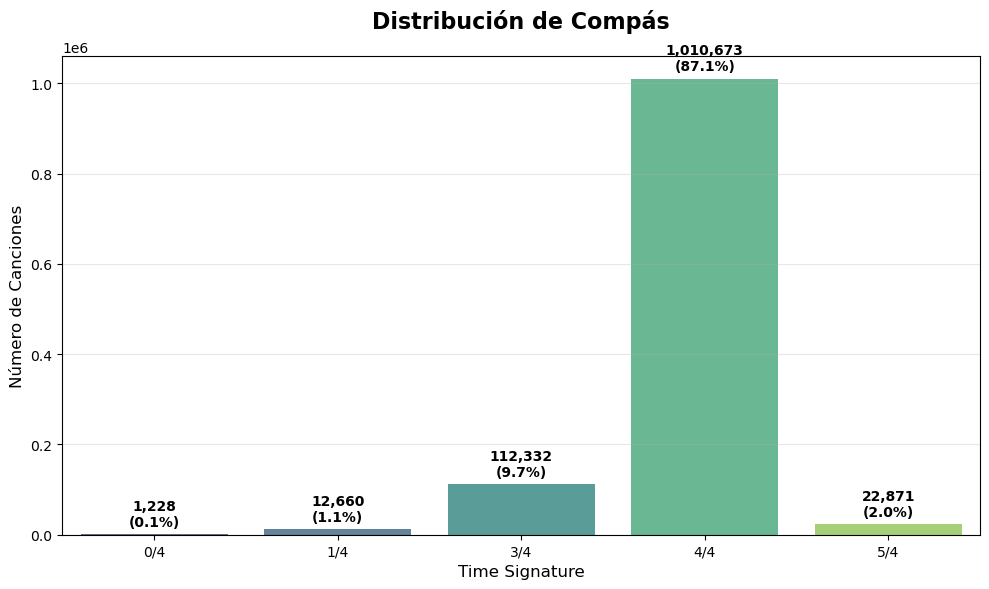

In [26]:
plt.figure(figsize=(10, 6))
time_sig_counts = df['time_signature'].value_counts().sort_index()

# Crear DataFrame para seaborn
plot_data = pd.DataFrame({
    'time_signature': [f'{int(x)}/4' for x in time_sig_counts.index],
    'count': time_sig_counts.values
})

# Gráfico con seaborn
ax = sns.barplot(data=plot_data, x='time_signature', y='count', 
                palette='viridis', alpha=0.8)

# Personalizar
plt.title('Distribución de Compás', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Time Signature', fontsize=12)
plt.ylabel('Número de Canciones', fontsize=12)

# Agregar valores y porcentajes
for i, (count) in enumerate(time_sig_counts.values):
    percentage = (count / len(df)) * 100
    ax.text(i, count + len(df)*0.01, f'{count:,}\n({percentage:.1f}%)', 
            ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [27]:
all_analysis_vars = {
    'Producción Musical': ['loudness', 'energy', 'danceability', 'valence'],
    'Características Estilísticas': ['acousticness', 'speechiness', 'instrumentalness', 'liveness'], 
    'Aspectos Técnicos': ['tempo', 'duration_min'],
    'Popularidad': ['popularity']
}

# Diccionario para traducir los títulos
spanish_titles = {
    'popularity': 'Popularidad',
    'acousticness': 'Acústica',
    'danceability': 'Bailabilidad',
    'energy': 'Energía',
    'instrumentalness': 'Instrumentalidad',
    'liveness': 'Vitalidad',
    'loudness': 'Volumen',
    'speechiness': 'Hablado',
    'tempo': 'Tempo',
    'valence': 'Valencia',
    'duration_min': 'Duración (min)'
}

# Obtener todas las variables en una lista
all_vars = []
for group in all_analysis_vars.values():
    all_vars.extend(group)

print(f"Variables a analizar: {len(all_vars)}")
for group_name, variables in all_analysis_vars.items():
    print(f"   • {group_name}: {', '.join(variables)}")

# Calcular evolución anual para todas las variables
yearly_evolution_complete = df.groupby('year')[all_vars].mean().round(4)
print(f"\nPeríodo de análisis: {yearly_evolution_complete.index.min()} - {yearly_evolution_complete.index.max()}")
print(f"Total de años: {len(yearly_evolution_complete)} años")

Variables a analizar: 11
   • Producción Musical: loudness, energy, danceability, valence
   • Características Estilísticas: acousticness, speechiness, instrumentalness, liveness
   • Aspectos Técnicos: tempo, duration_min
   • Popularidad: popularity

Período de análisis: 2000 - 2023
Total de años: 24 años



ANÁLISIS POR GRUPOS DE CARACTERÍSTICAS


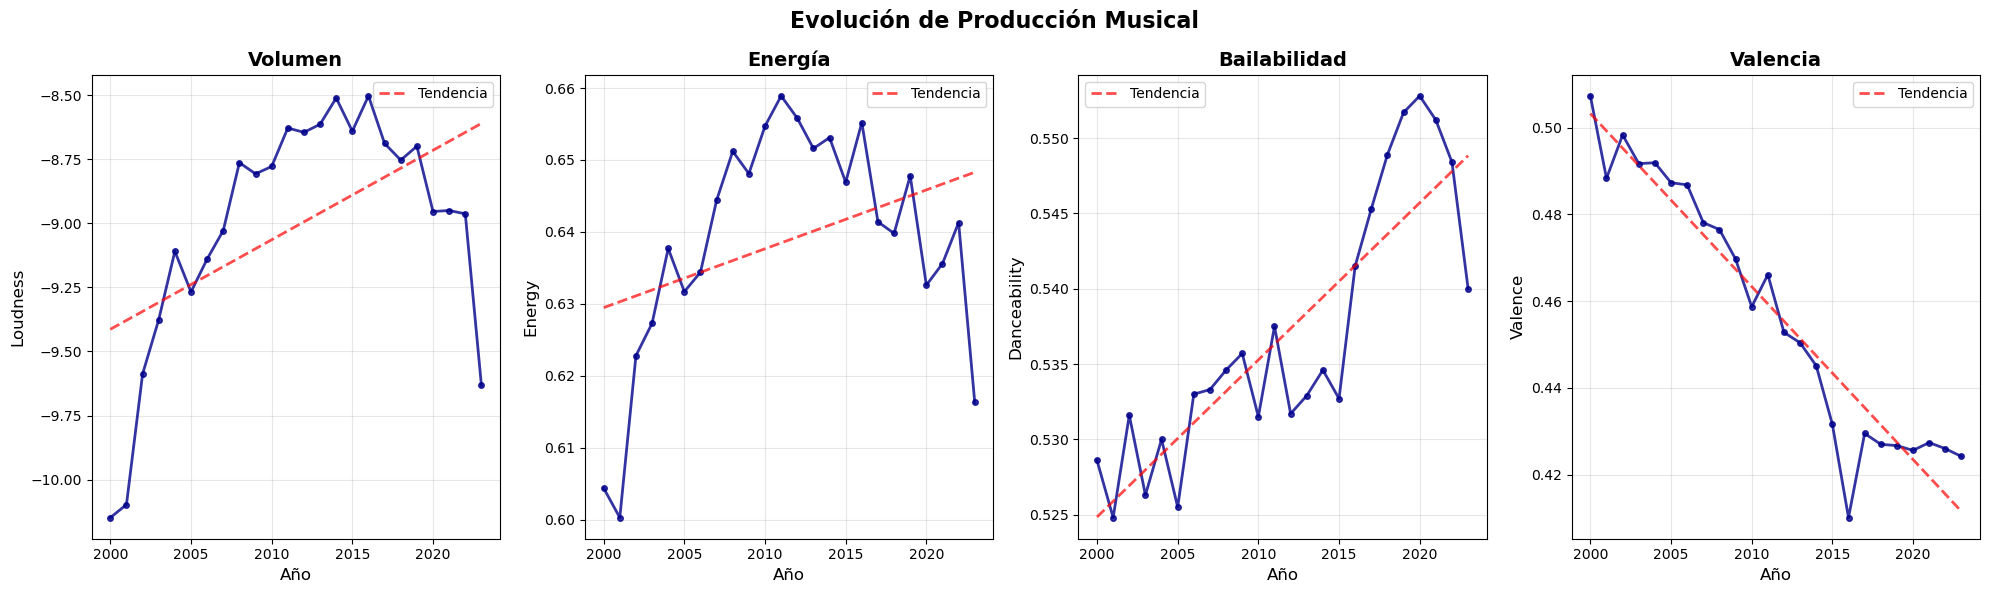

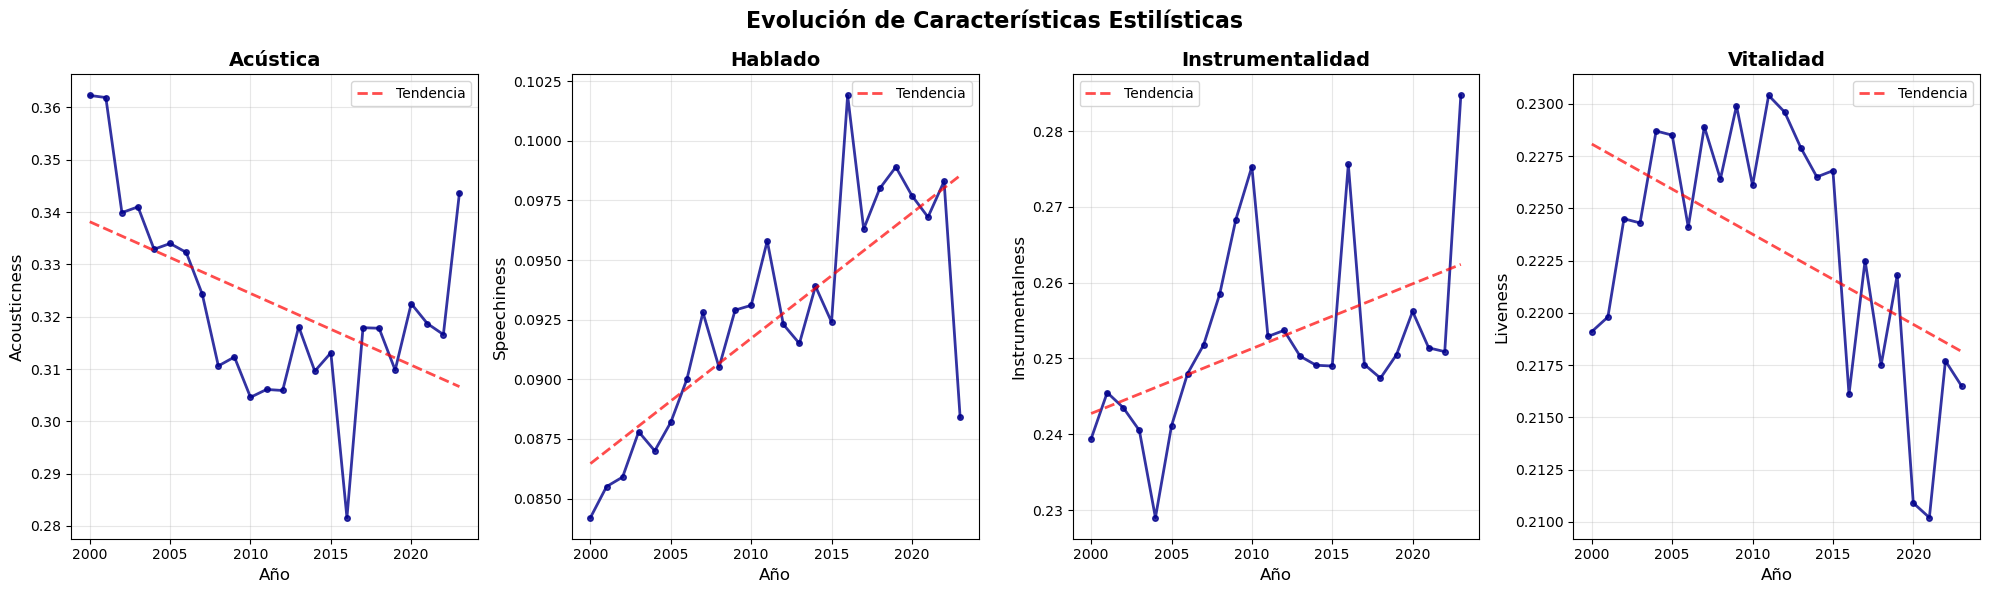

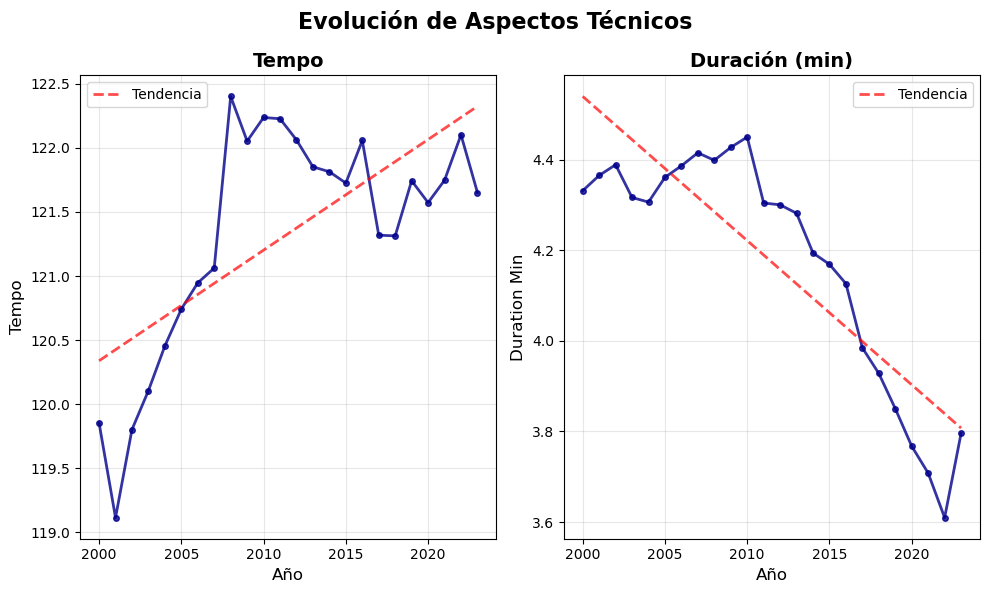

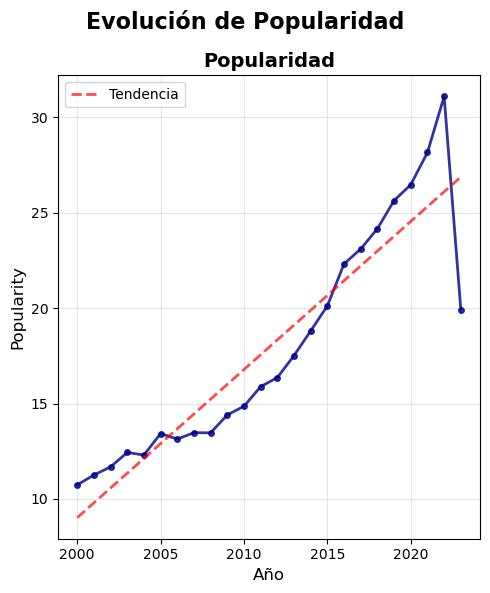

In [28]:
print("\nANÁLISIS POR GRUPOS DE CARACTERÍSTICAS")
print("=" * 55)

# Función para crear gráficos por grupo
def plot_group_evolution(group_name, variables, yearly_data):
    fig, axes = plt.subplots(1, len(variables), figsize=(5*len(variables), 6))
    if len(variables) == 1:
        axes = [axes]
    
    for i, var in enumerate(variables):
        # Gráfico de líneas
        axes[i].plot(yearly_data.index, yearly_data[var], 
                    marker='o', linewidth=2, markersize=4, color='darkblue', alpha=0.8)
        
        # Línea de tendencia
        z = np.polyfit(yearly_data.index, yearly_data[var], 1)
        p = np.poly1d(z)
        axes[i].plot(yearly_data.index, p(yearly_data.index), 
                    "r--", alpha=0.7, linewidth=2, label='Tendencia')
        
        # Personalizar gráfico
        axes[i].set_title(f'{spanish_titles[var]}', fontweight='bold', fontsize=14)
        axes[i].set_xlabel('Año', fontsize=12)
        axes[i].set_ylabel(f'{var.replace("_", " ").title()}', fontsize=12)
        axes[i].grid(True, alpha=0.3)
        axes[i].legend()
        
        # Calcular estadísticas de tendencia
        slope = z[0]
        inicio = yearly_data[var].iloc[0]
        fin = yearly_data[var].iloc[-1]
        cambio_porcentual = ((fin - inicio) / abs(inicio)) * 100 if inicio != 0 else 0
        
    plt.suptitle(f'Evolución de {group_name}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Crear gráficos para cada grupo
for group_name, variables in all_analysis_vars.items():
    plot_group_evolution(group_name, variables, yearly_evolution_complete)